<a href="https://colab.research.google.com/github/Rejuvesh/22BDS0267_EDA/blob/main/22BDS0267.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **22BDS0267**
## **J REJUVESH**
## **BCSE331L - EDA Project**

In [23]:
# 1. Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

## I began by importing the necessary Python libraries: pandas and numpy for data handling, matplotlib and seaborn for visualization. The Seaborn style was set to "whitegrid" with a pastel color palette for a clean look, and the default figure size was adjusted to make plots more readable.

In [24]:
# 2. Load the dataset
file_path = "/content/econmath.csv"
df = pd.read_csv(file_path)

## The dataset econmath.csv was loaded into a pandas DataFrame named df using pd.read_csv(). This allows to store and work with the data in a tabular format for analysis.

In [25]:
# 3. Basic Exploration
print("===== Dimensions =====")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

print("===== Data Types =====")
print(df.dtypes, "\n")

print("===== First 5 Rows =====")
print(df.head(), "\n")

print("===== Summary Statistics (Numeric) =====")
print(df.describe(), "\n")

categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

if categorical_cols:
    print(df[categorical_cols].describe(), "\n")
else:
    print("No categorical (object/string) columns found in the dataset.\n")

===== Dimensions =====
Rows: 856, Columns: 18

===== Data Types =====
rownames      int64
age           int64
work        float64
study       float64
econhs        int64
colgpa      float64
hsgpa       float64
acteng      float64
actmth      float64
act         float64
mathscr       int64
male          int64
calculus      int64
attexc        int64
attgood       int64
fathcoll      int64
mothcoll      int64
score       float64
dtype: object 

===== First 5 Rows =====
   rownames  age  work  study  econhs  colgpa  hsgpa  acteng  actmth   act  \
0         1   23  15.0   10.0       0  3.4909  3.355    24.0    26.0  27.0   
1         2   23   0.0   22.5       1  2.1000  3.219    23.0    20.0  24.0   
2         3   21  25.0   12.0       0  3.0851  3.306    21.0    24.0  21.0   
3         4   22  30.0   40.0       0  2.6805  3.977    31.0    28.0  31.0   
4         5   22  25.0   15.0       1  3.7454  3.890    28.0    31.0  32.0   

   mathscr  male  calculus  attexc  attgood  fathcoll  mothc

## I performed an initial exploration of the dataset by:

## Checking its dimensions (number of rows and columns).

## Viewing data types for each column.

## Displaying the first 5 rows to understand its structure.

## Generating summary statistics for numerical columns.

## Identifying categorical columns (if any).
## **In this dataset, no categorical (object/string) columns were found.**

In [26]:
#  Data Overview Table
overview = pd.DataFrame({
    "Data Type": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "Missing %": round(df.isnull().mean()*100, 2),
    "Unique Values": df.nunique()
})
print("===== Data Overview =====")
print(overview)

===== Data Overview =====
         Data Type  Missing Values  Missing %  Unique Values
rownames     int64               0       0.00            856
age          int64               0       0.00              9
work       float64               0       0.00             44
study      float64               0       0.00             52
econhs       int64               0       0.00              2
colgpa     float64               0       0.00            612
hsgpa      float64               0       0.00            531
acteng     float64              42       4.91             23
actmth     float64              42       4.91             23
act        float64              42       4.91             20
mathscr      int64               0       0.00             11
male         int64               0       0.00              2
calculus     int64               0       0.00              2
attexc       int64               0       0.00              2
attgood      int64               0       0.00              

##The Data Overview table summarizes key information for each column, including:

##Data Type (integer, float, etc.).

##Missing Values count and percentage.

##Unique Values count.

##**Most columns have no missing data, except acteng, actmth, and act, which have around 4.91% missing values each. This table helps in planning data cleaning steps.**

In [27]:
# 4. Data Handling
print("===== Missing Values =====")
print(df.isnull().sum(), "\n")

print("===== Duplicate Rows =====")
print(df.duplicated().sum(), "\n")


===== Missing Values =====
rownames     0
age          0
work         0
study        0
econhs       0
colgpa       0
hsgpa        0
acteng      42
actmth      42
act         42
mathscr      0
male         0
calculus     0
attexc       0
attgood      0
fathcoll     0
mothcoll     0
score        0
dtype: int64 

===== Duplicate Rows =====
0 



# acteng, actmth, and act columns each have 42 missing values.
# No other columns have missing values.
# There are no duplicate rows in the dataset.

In [28]:
# Step 5: Data Cleaning

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert all columns that can be numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Fill missing values
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("===== Missing Values After Cleaning =====")
print(df.isnull().sum(), "\n")


===== Missing Values After Cleaning =====
rownames    0
age         0
work        0
study       0
econhs      0
colgpa      0
hsgpa       0
acteng      0
actmth      0
act         0
mathscr     0
male        0
calculus    0
attexc      0
attgood     0
fathcoll    0
mothcoll    0
score       0
dtype: int64 



/tmp/ipython-input-582069337.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


# All missing values have been successfully filled.
# No column contains NaN values after cleaning.
# Numeric columns were filled with their median.
# Non-numeric columns were filled with their most frequent value (mode).
# Duplicate rows were removed.

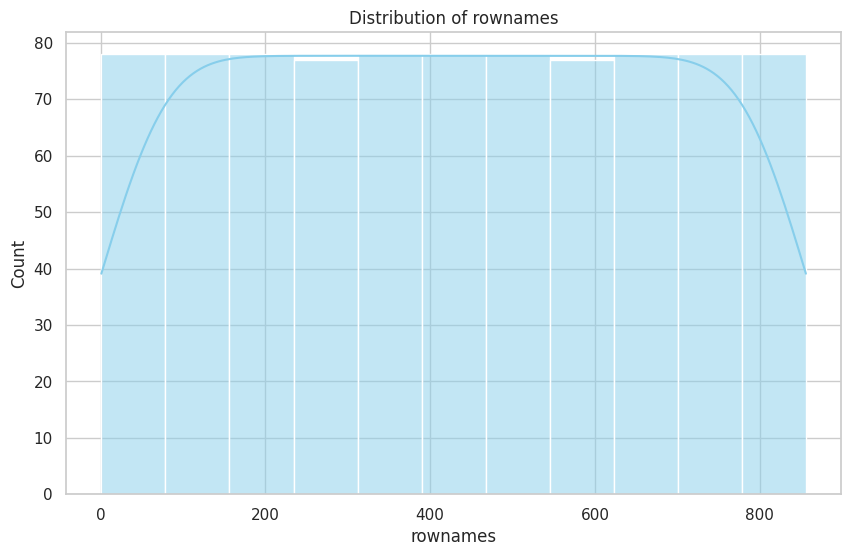

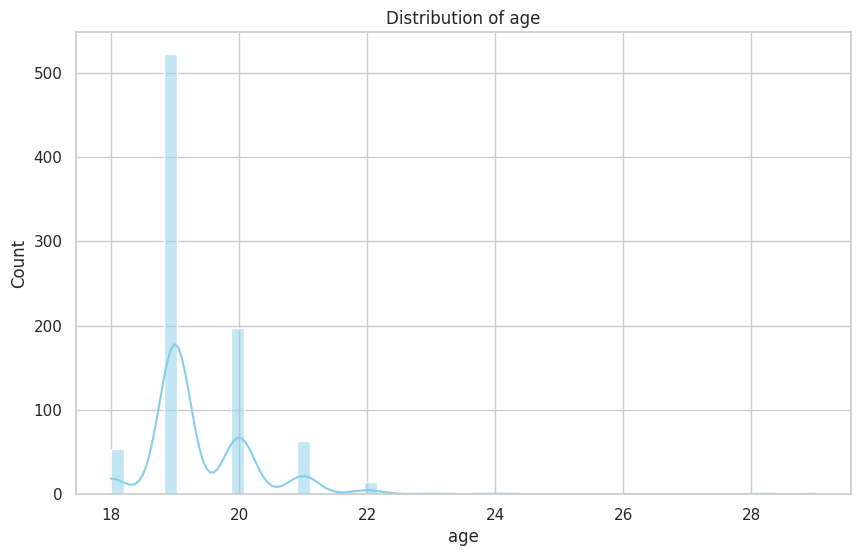

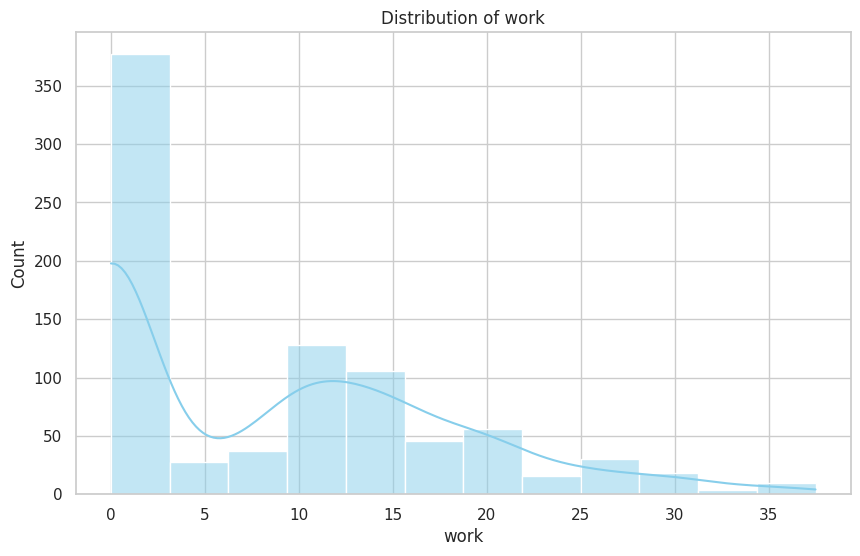

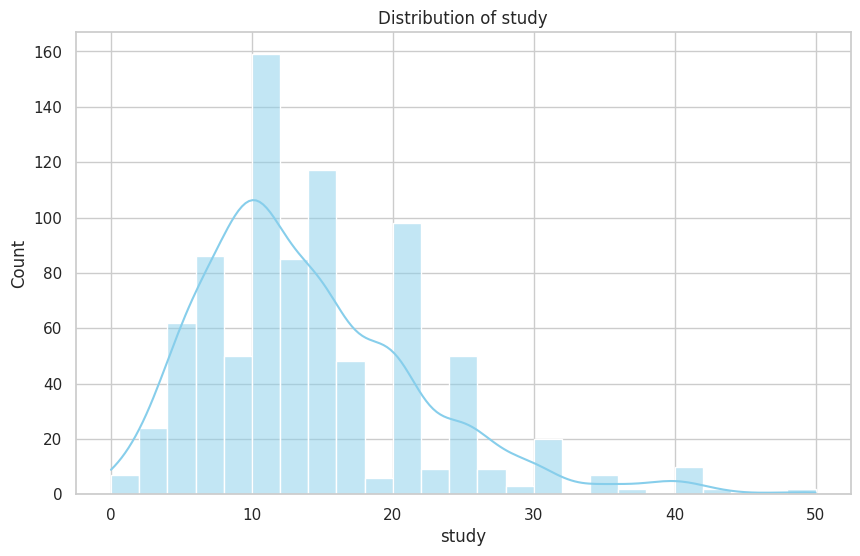

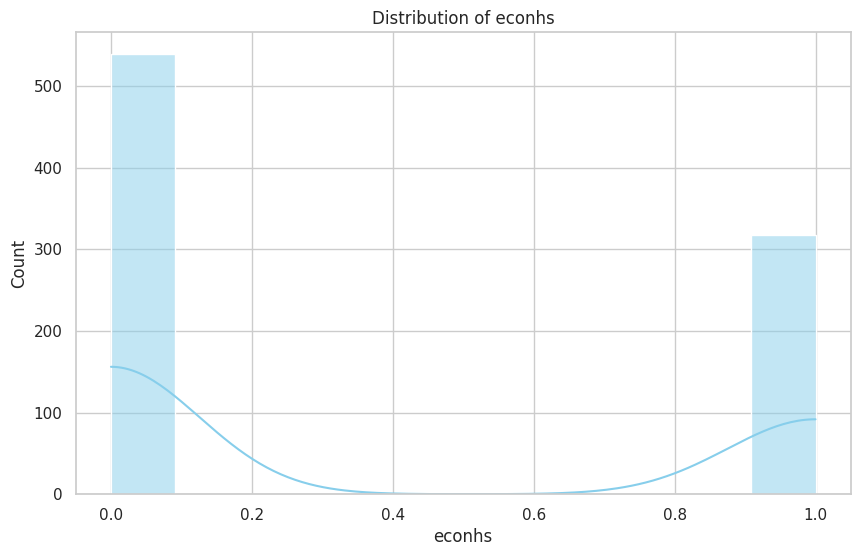

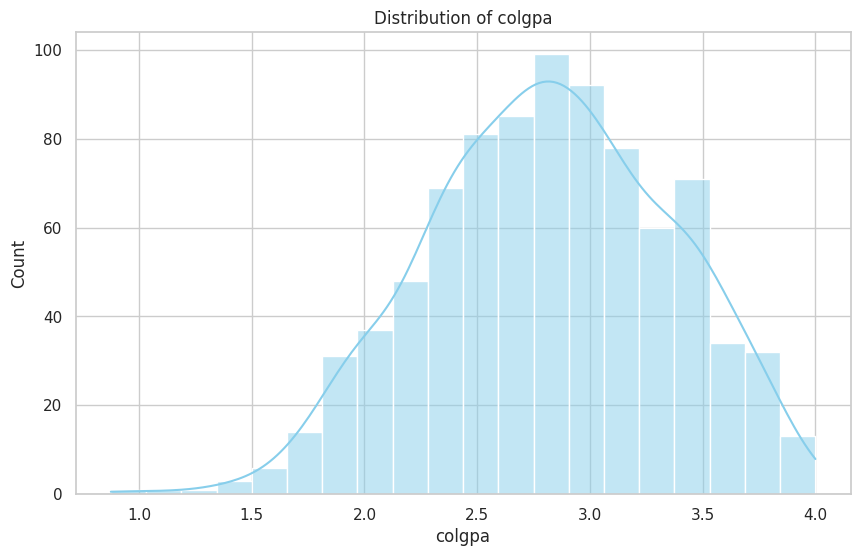

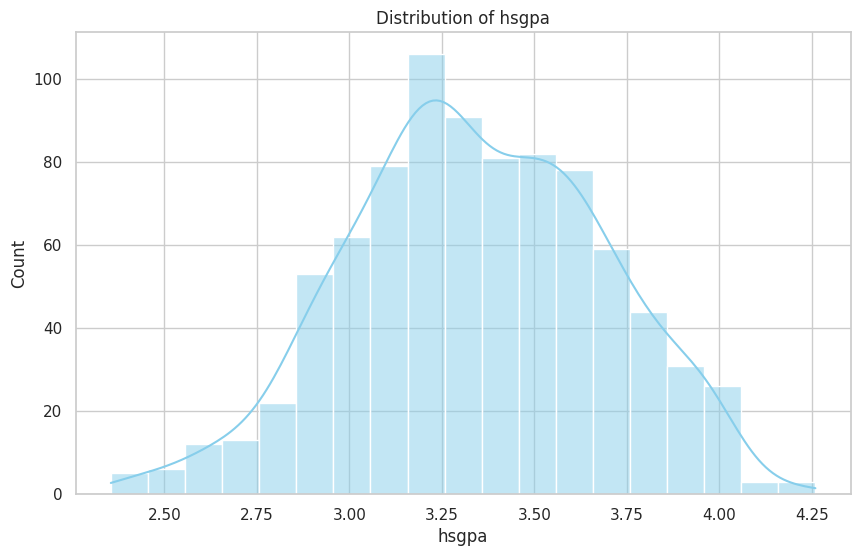

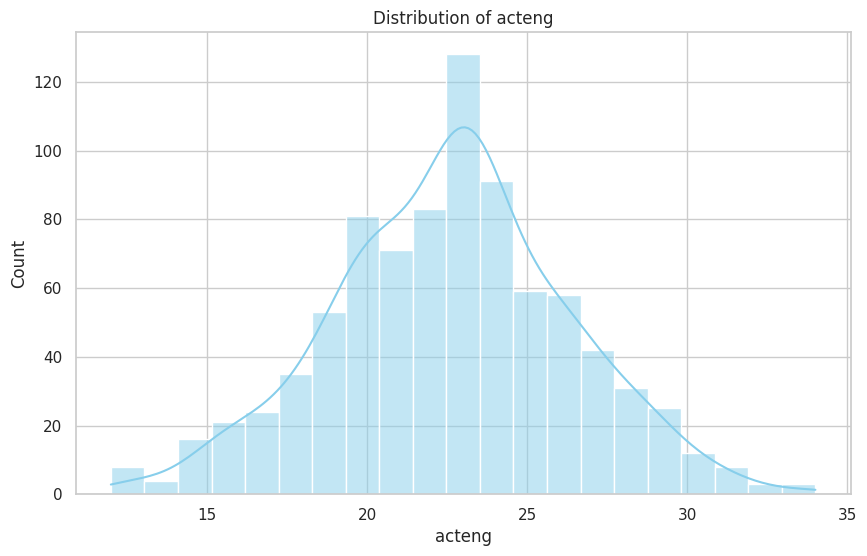

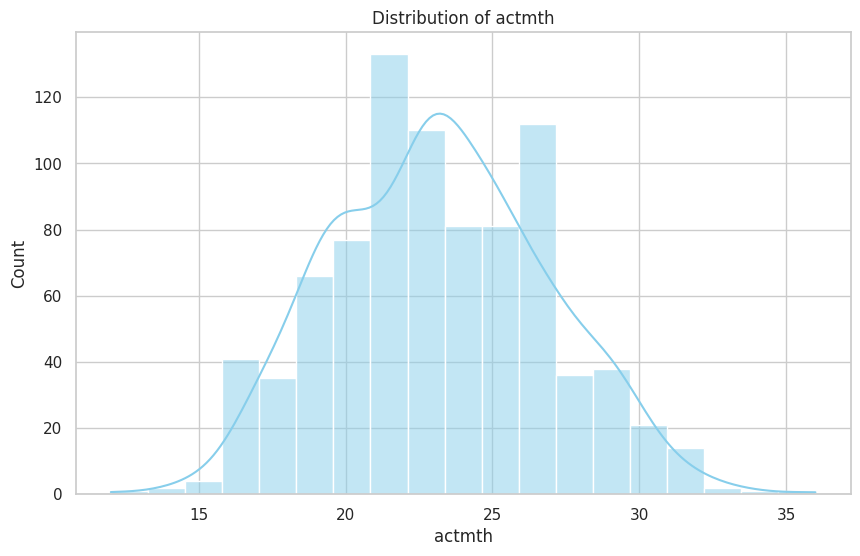

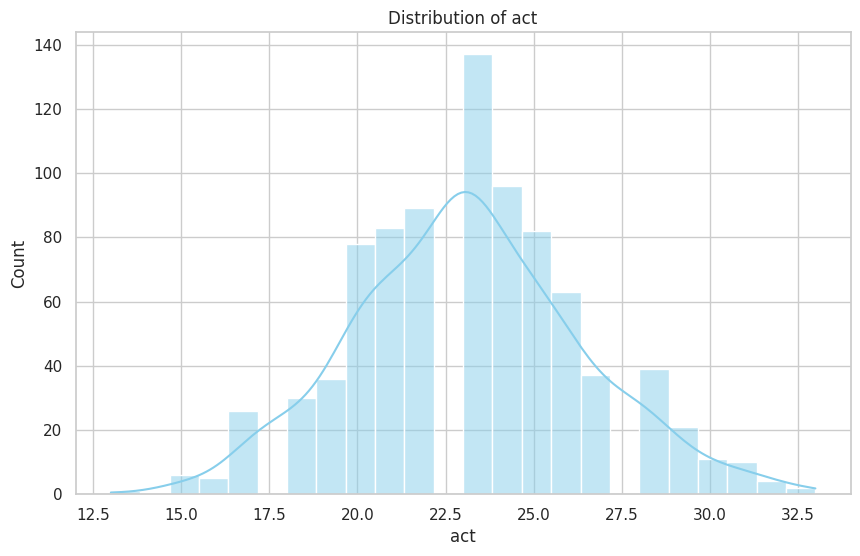

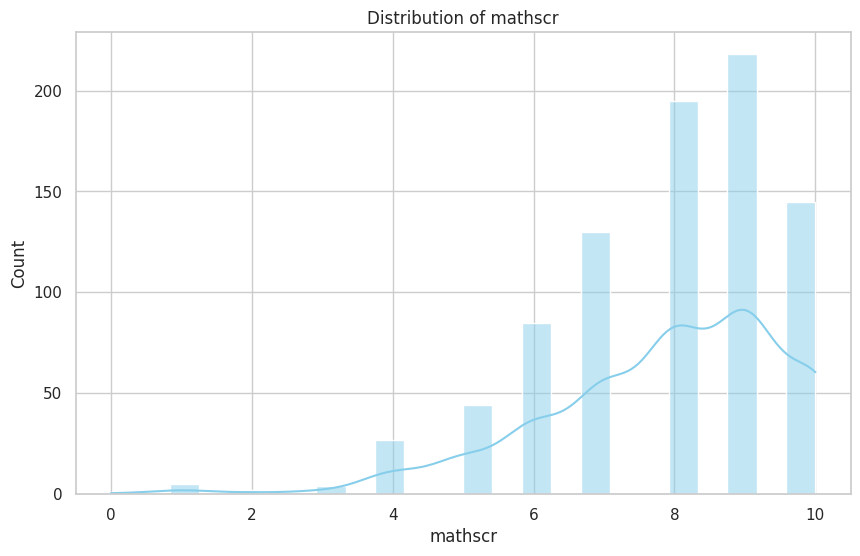

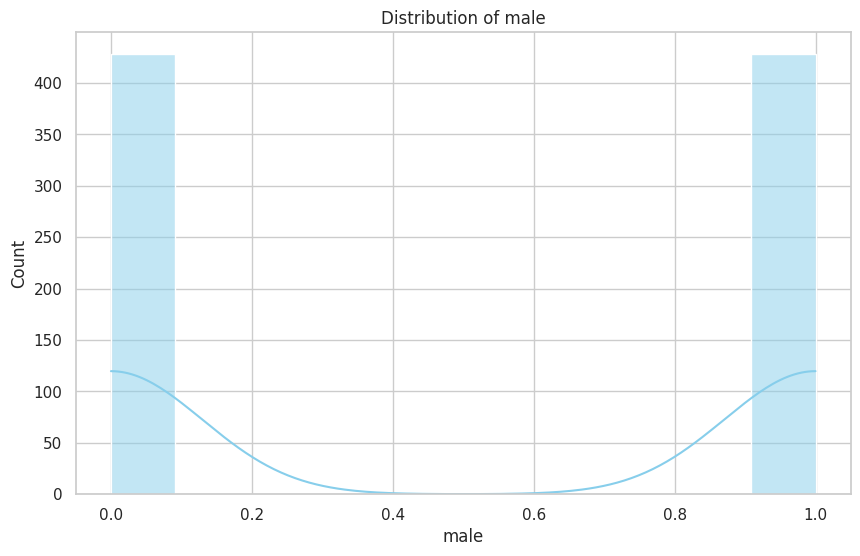

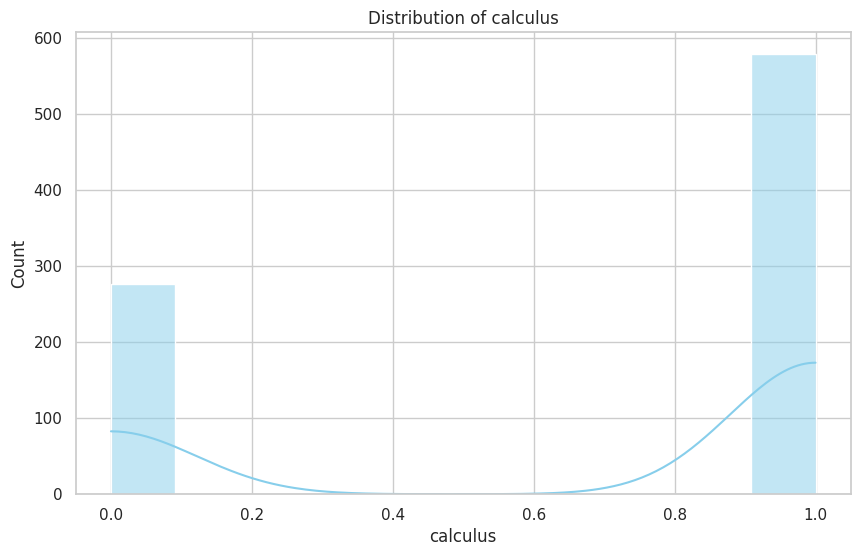

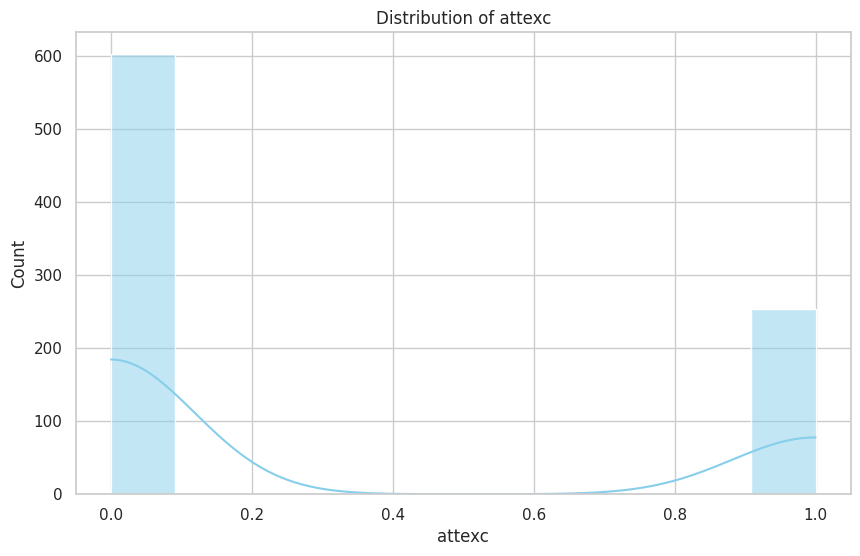

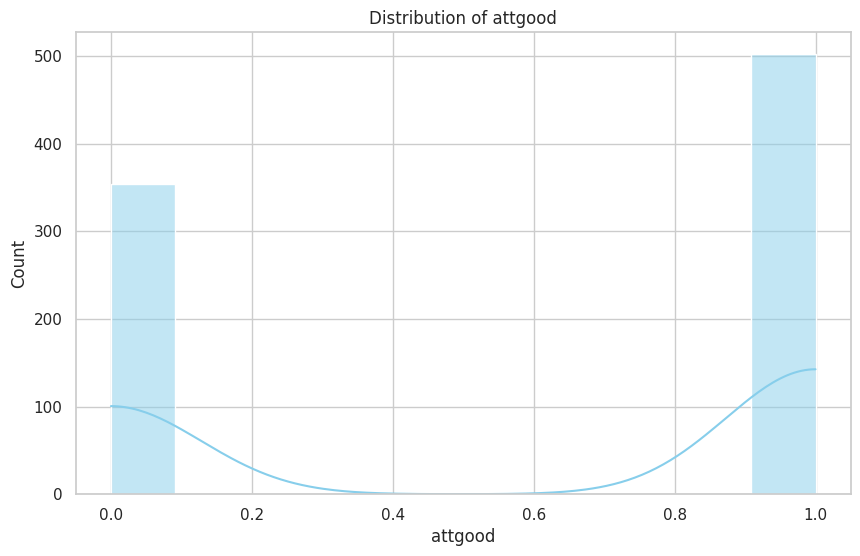

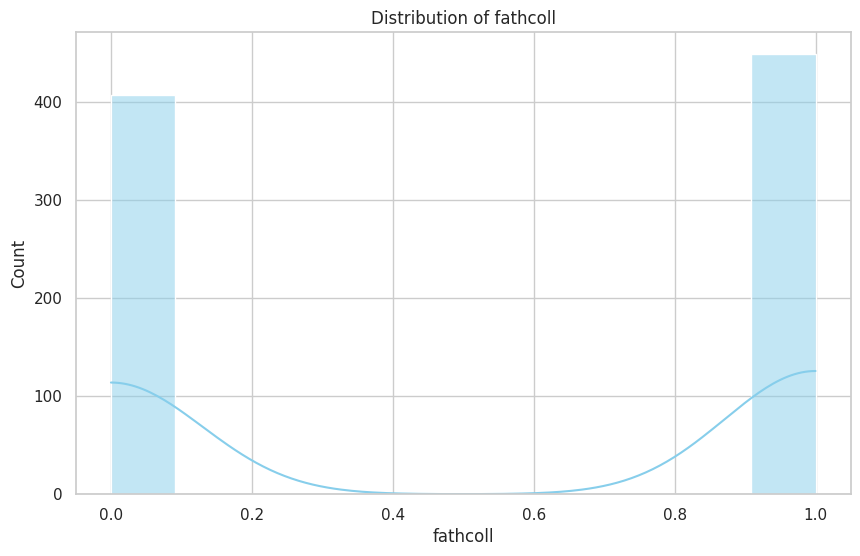

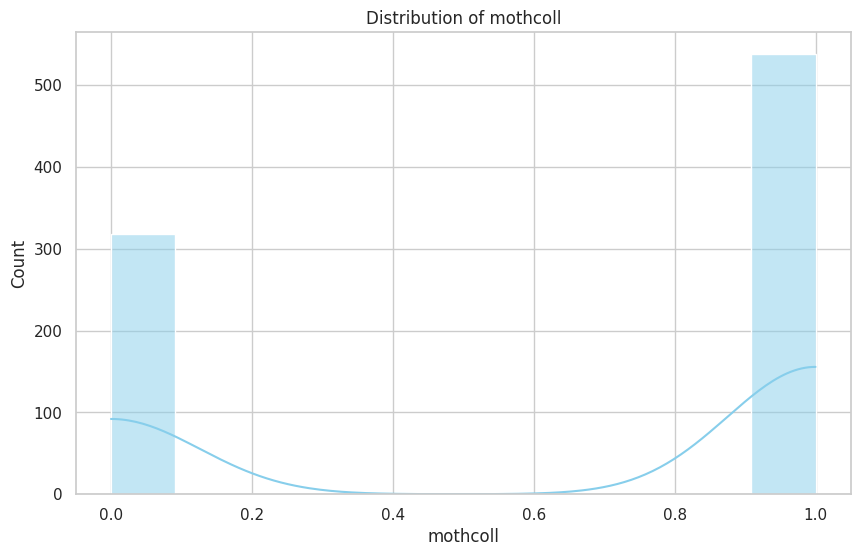

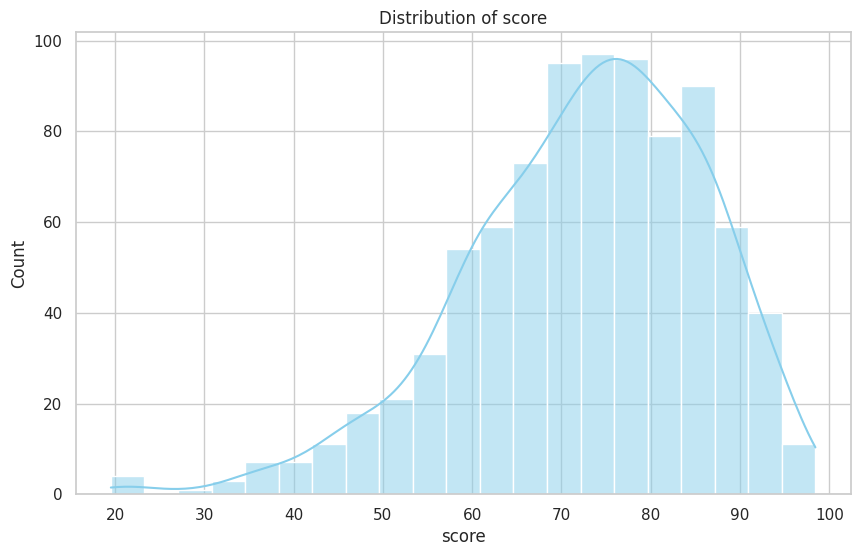

In [29]:
# 6. Univariate Analysis
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Histograms for numeric columns
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Countplots for categorical columns
for col in categorical_cols:
    plt.figure()
    sns.countplot(x=df[col], palette="muted")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


##For numeric columns → Histograms show the distribution and spread of values.
# For categorical columns → Count plots show the frequency of each category.
# This helps identify data patterns, common values, and possible outliers.

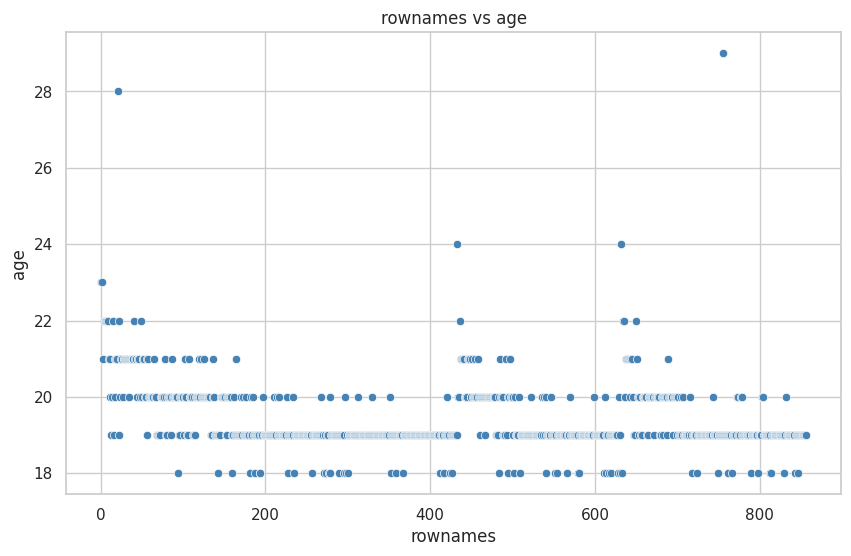

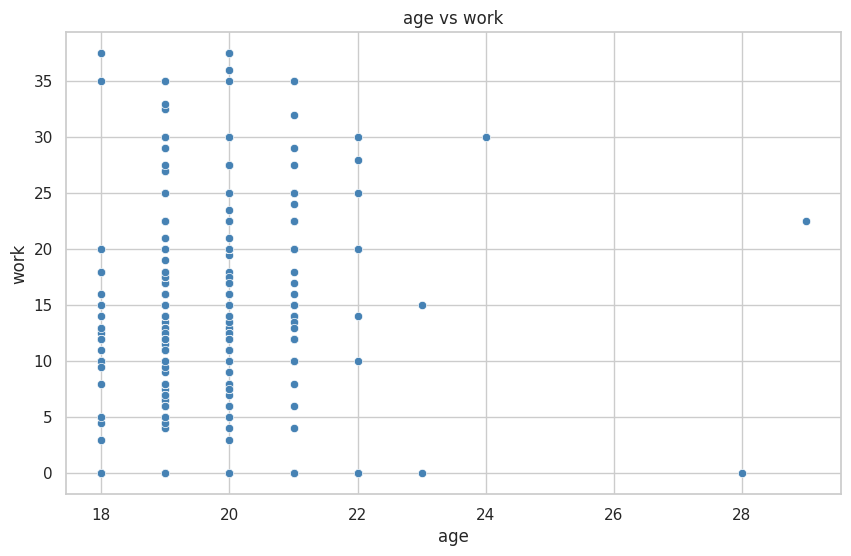

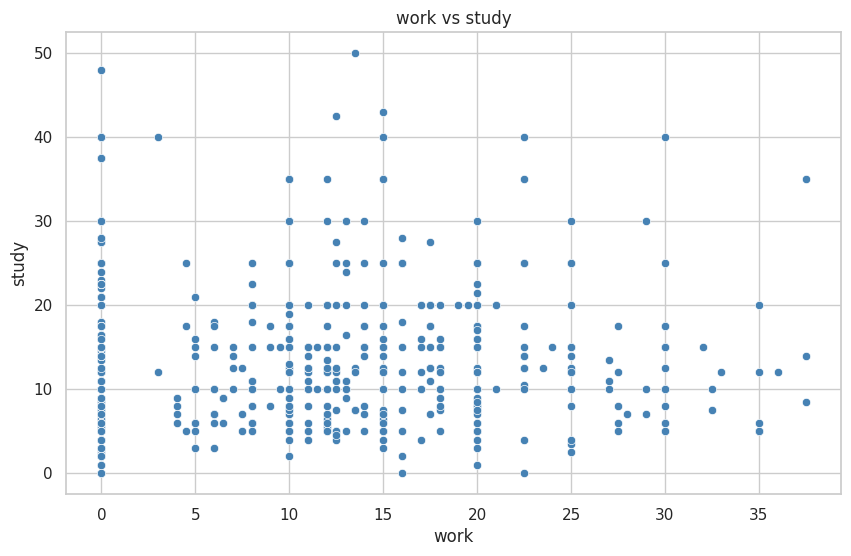

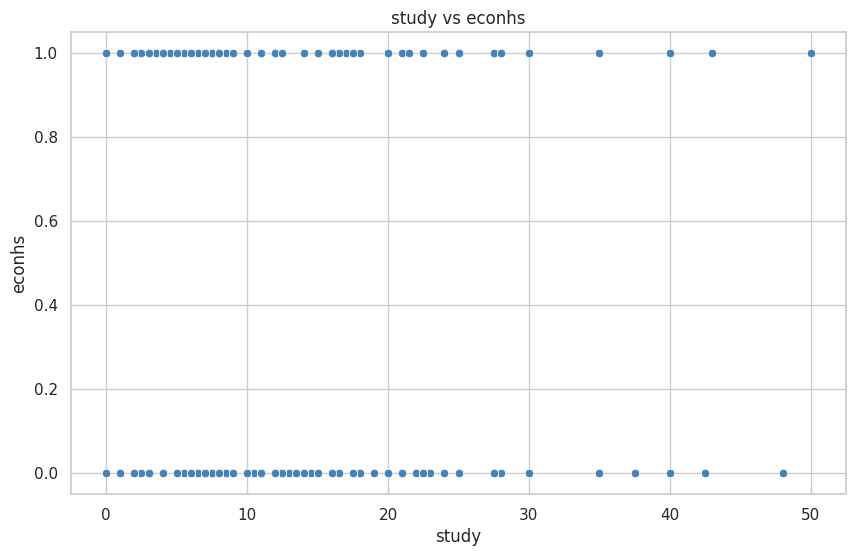

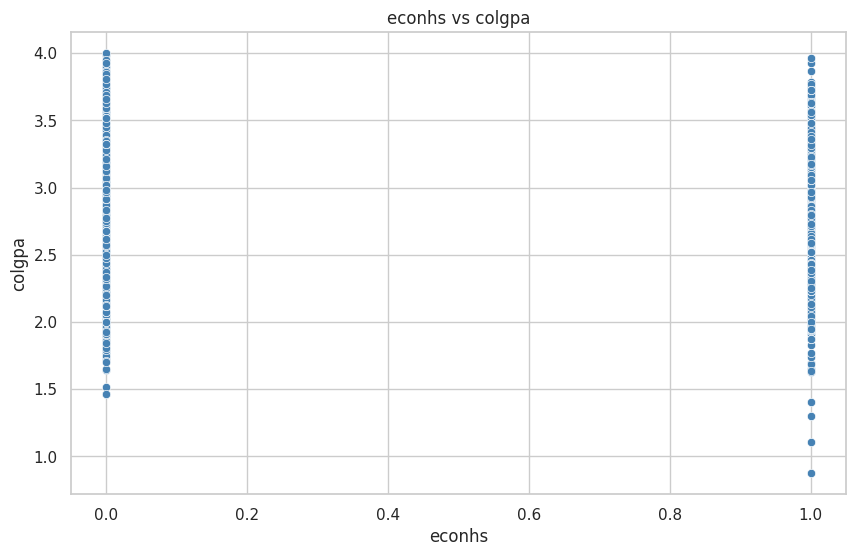

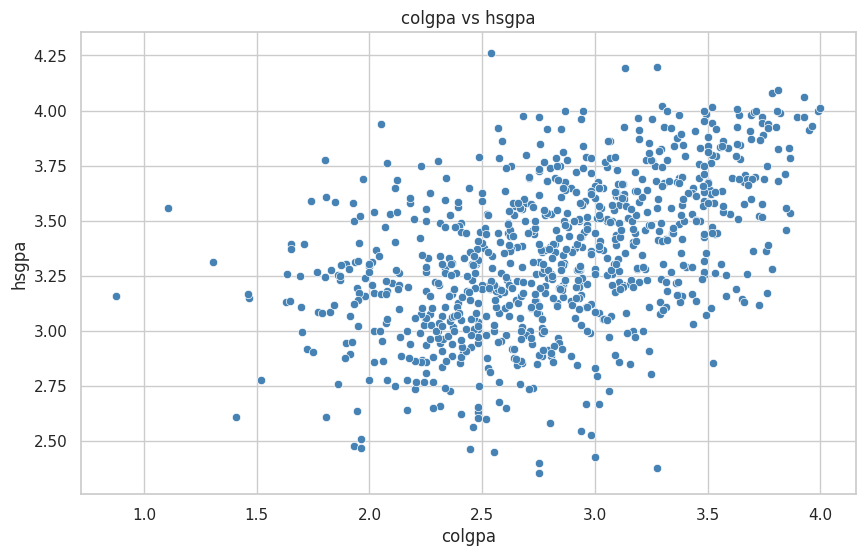

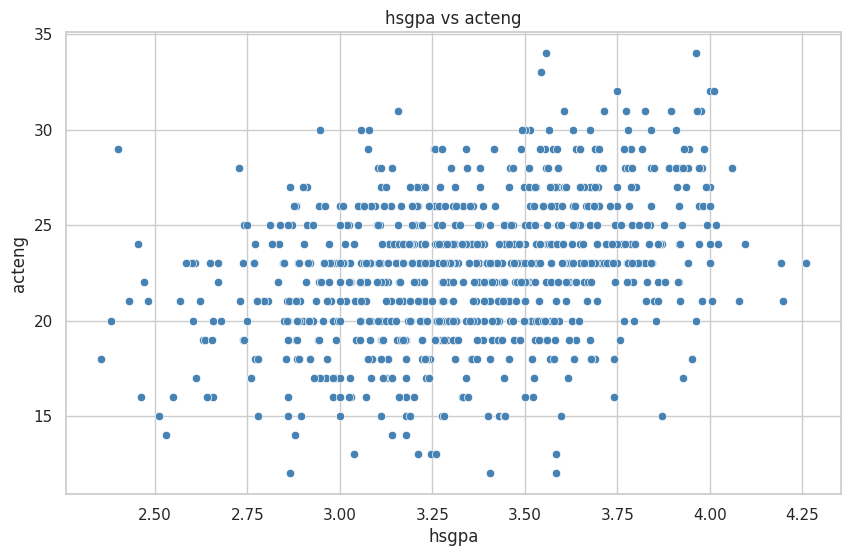

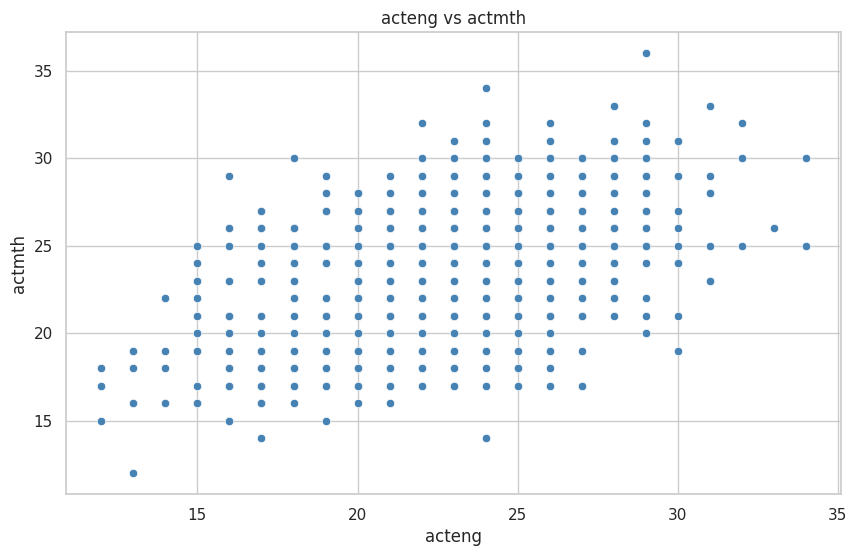

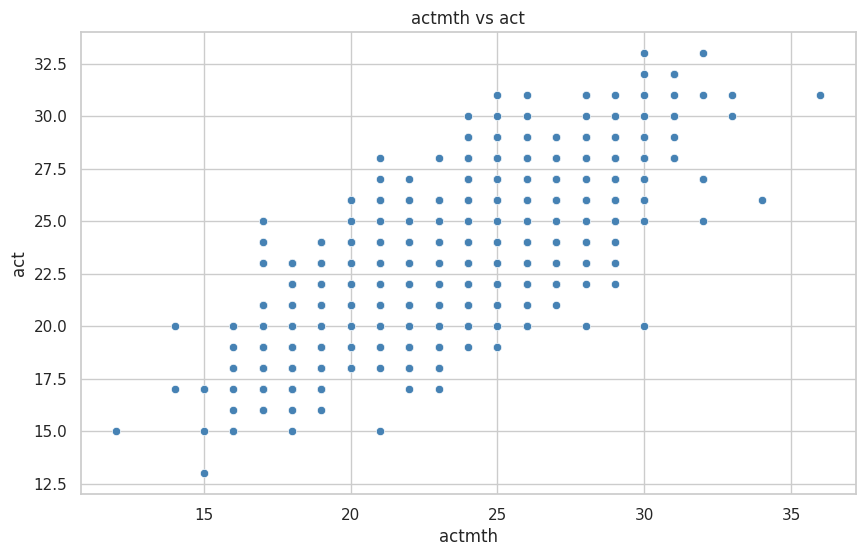

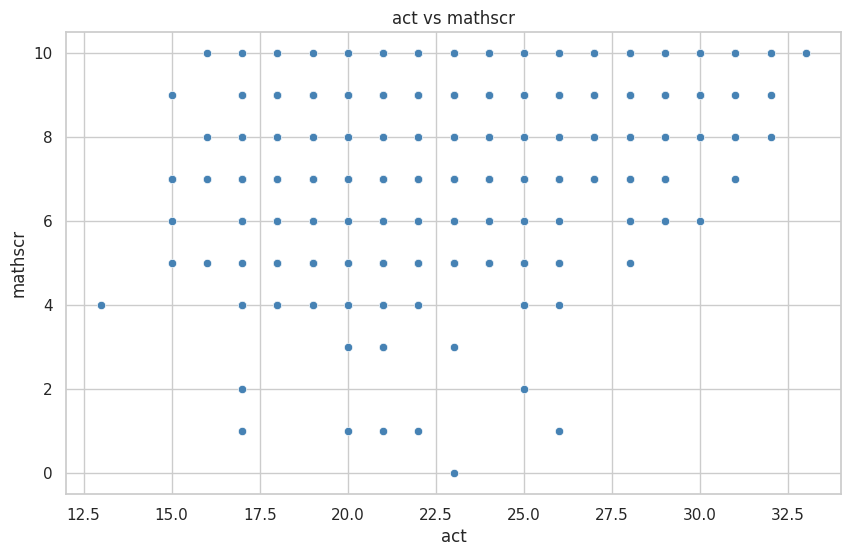

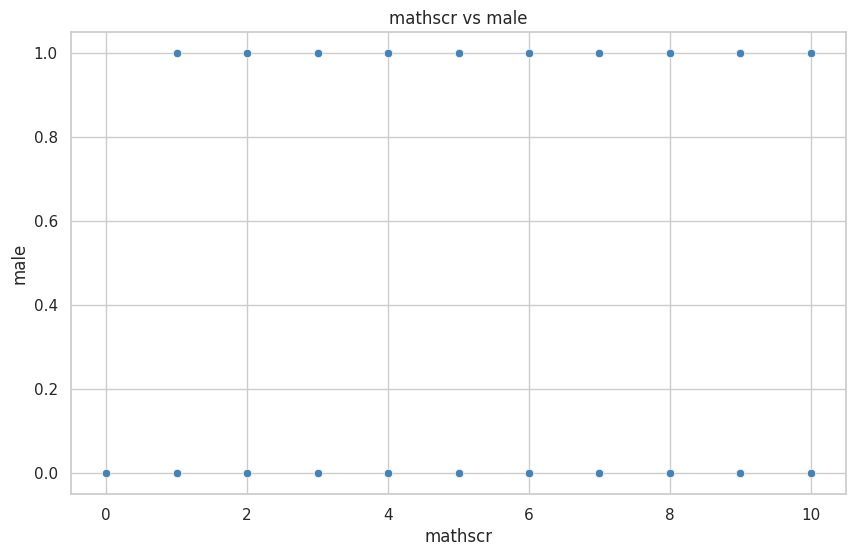

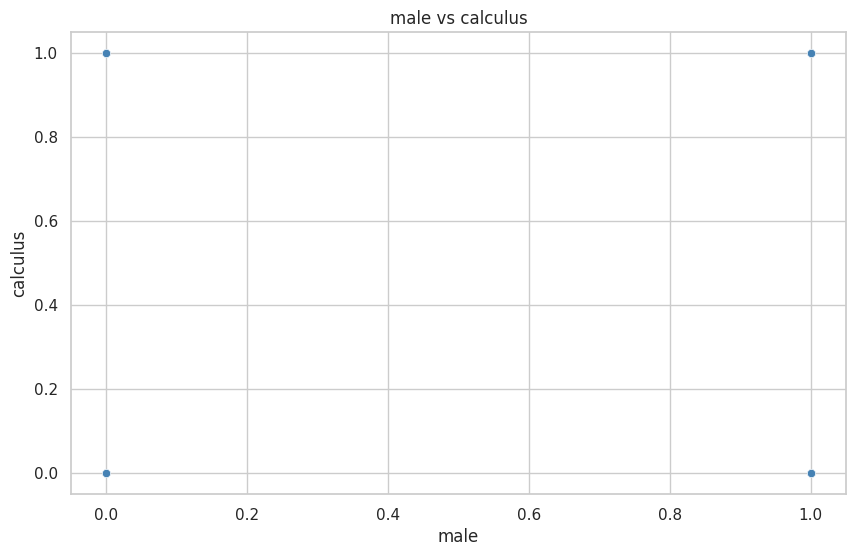

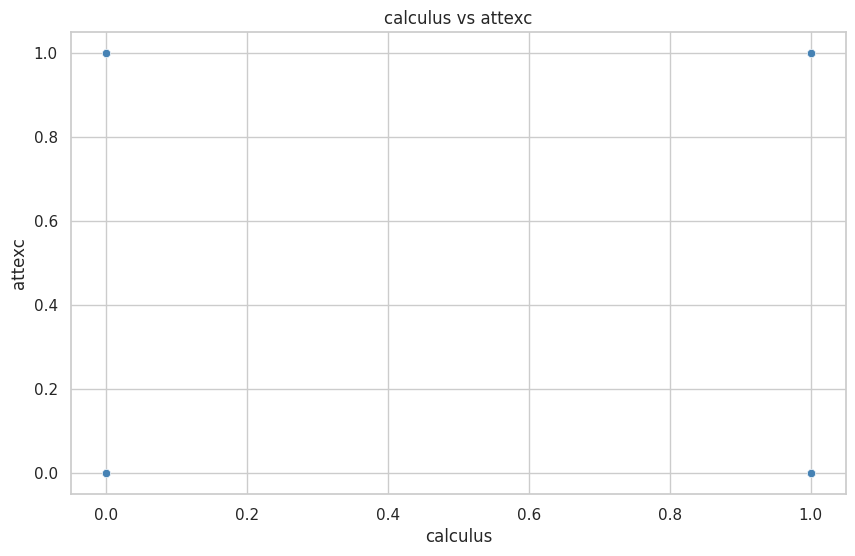

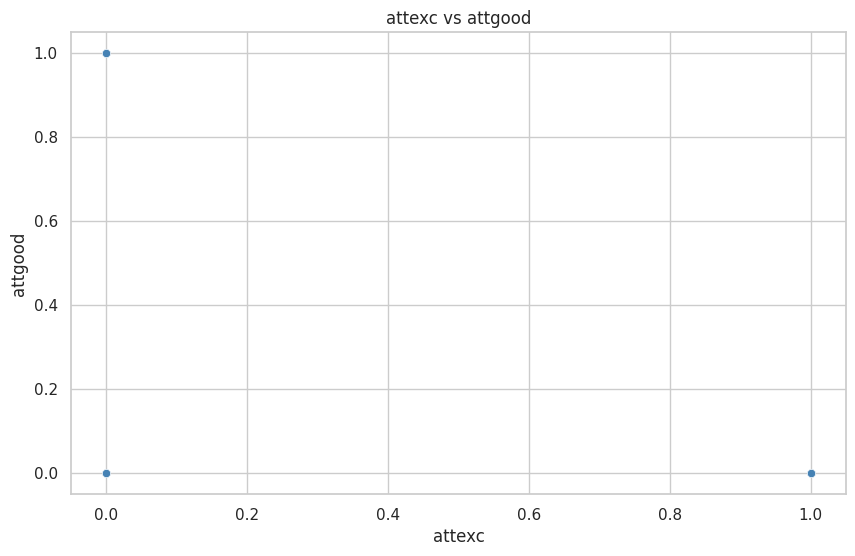

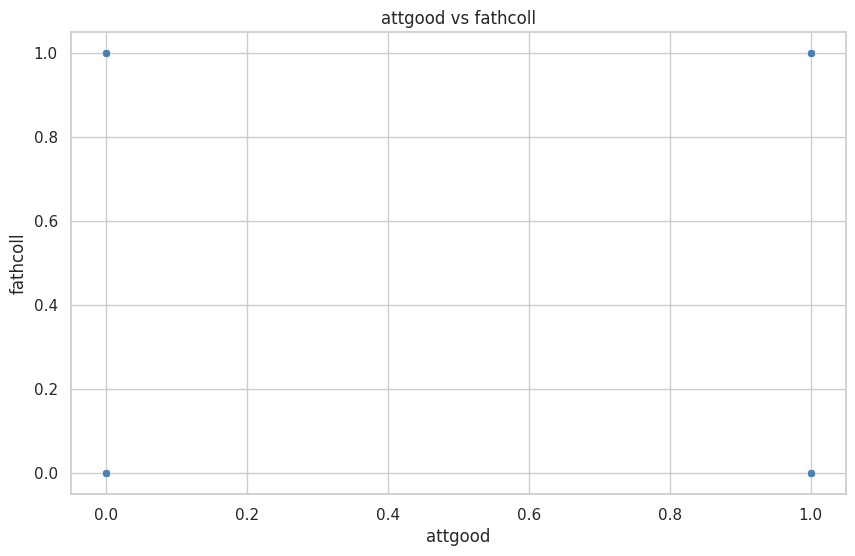

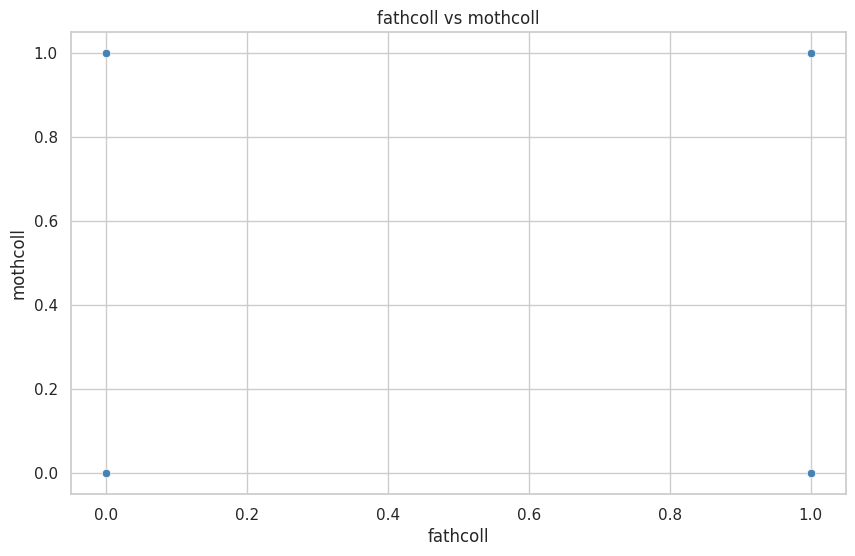

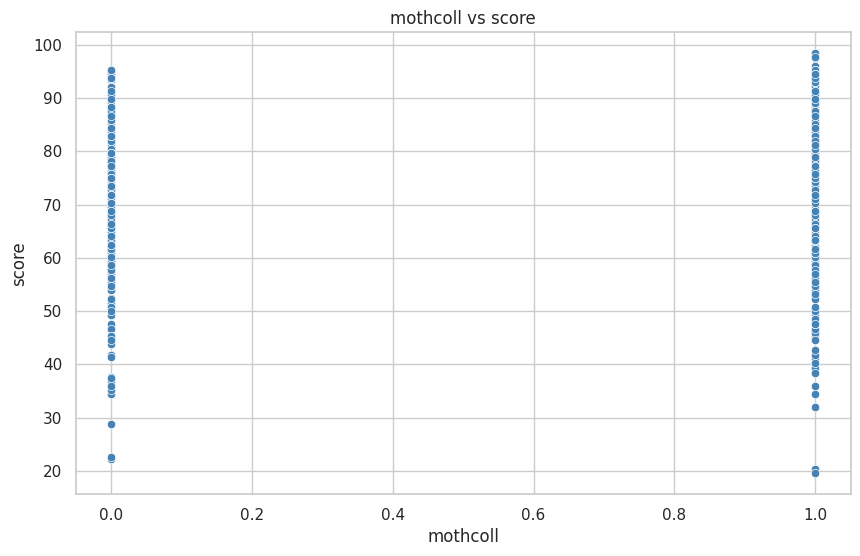

No categorical variables found — skipping boxplot section.



In [30]:
# 7. Bivariate Analysis
# Numeric vs Numeric: Scatterplots
if len(numeric_cols) >= 2:
    for i in range(len(numeric_cols) - 1):
        plt.figure()
        if categorical_cols:  # If we have at least one categorical variable
            sns.scatterplot(
                x=df[numeric_cols[i]],
                y=df[numeric_cols[i+1]],
                hue=df[categorical_cols[0]],
                palette="viridis"
            )
        else:  # No hue, just use a single color
            sns.scatterplot(
                x=df[numeric_cols[i]],
                y=df[numeric_cols[i+1]],
                color="steelblue"
            )
        plt.title(f"{numeric_cols[i]} vs {numeric_cols[i+1]}")
        plt.show()
# Categorical vs Numeric: Boxplots
palette_list = ["Set2", "coolwarm", "Spectral", "pastel", "mako"]

if categorical_cols:
    for idx, cat in enumerate(categorical_cols):
        for num in numeric_cols:
            plt.figure()
            sns.boxplot(x=df[cat], y=df[num], palette=palette_list[idx % len(palette_list)])
            plt.title(f"{num} by {cat}")
            plt.xticks(rotation=45)
            plt.show()
else:
    print("No categorical variables found — skipping boxplot section.\n")


# Numeric vs Numeric → Scatterplots show trends/correlations between numeric variables.

# No categorical variables are found, the boxplot section is skipped.


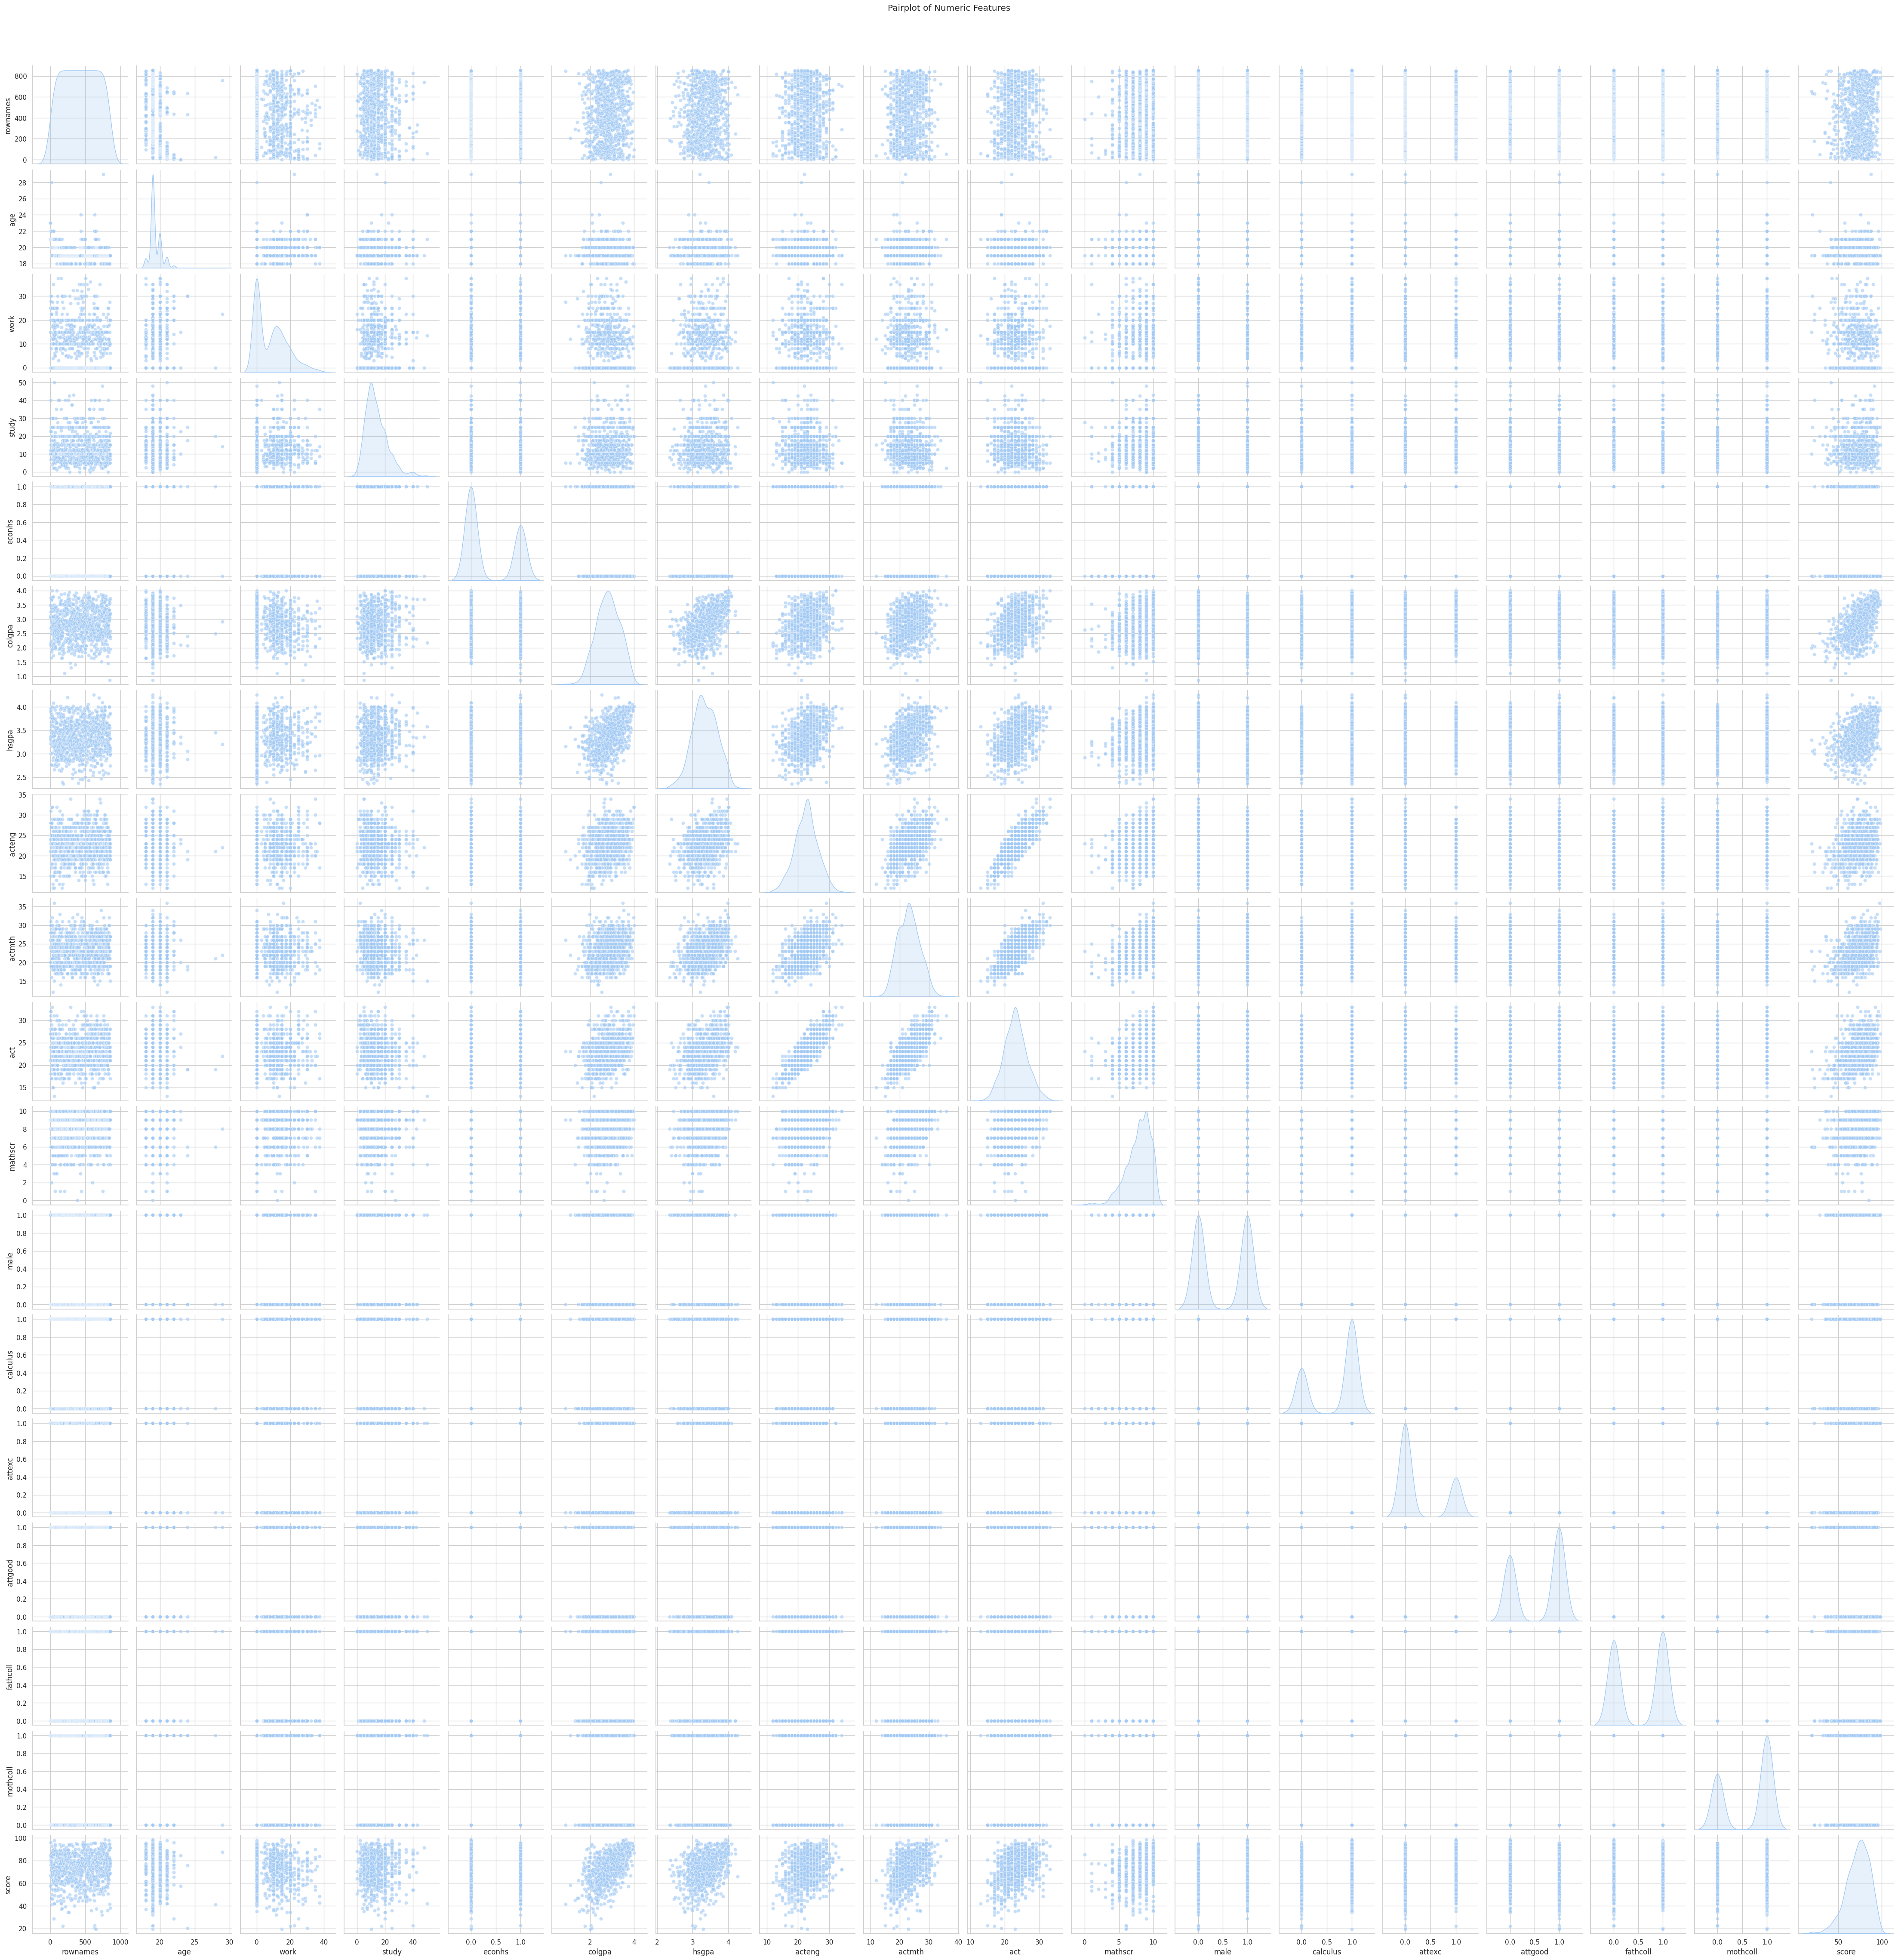

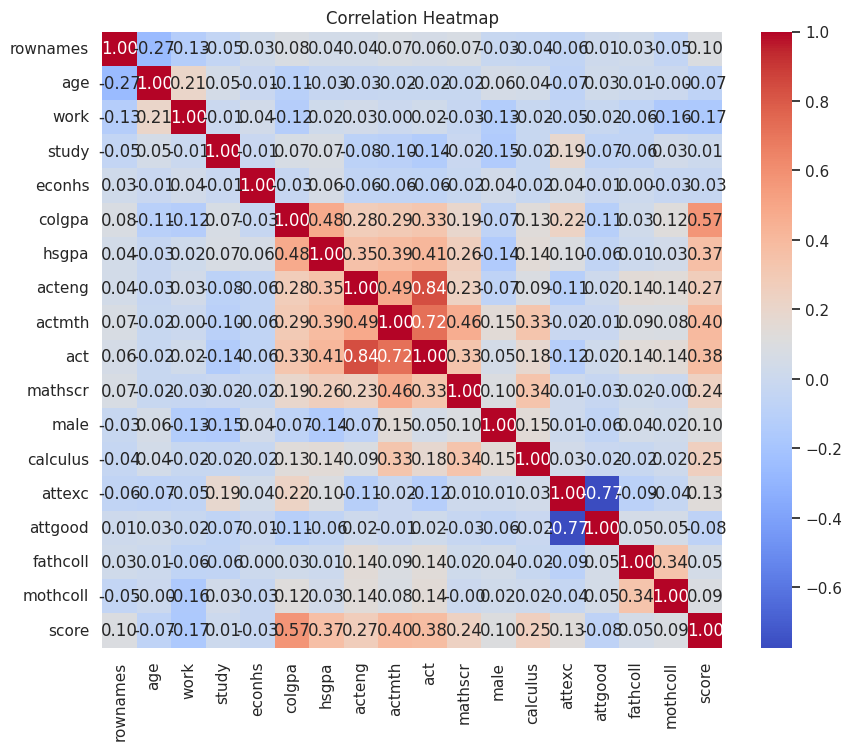

In [31]:
# 8. Multivariate Analysis
# Pairplot for numeric features
if len(numeric_cols) > 1:
    sns.pairplot(df[numeric_cols], diag_kind="kde", plot_kws={'alpha':0.6})
    plt.suptitle("Pairplot of Numeric Features", y=1.02)
    plt.show()

# Correlation Heatmap
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# Multivariate analysis explores relationships among multiple variables.
# Pairplot → Visualizes pairwise scatterplots and distributions for numeric features.
# Correlation Heatmap → Shows strength and direction of linear relationships between numeric variables.
# If fewer than 2 numeric columns exist, these plots are skipped.